In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [6]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=458f63d5fa9d2dde6d0159606d3c23a5"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=458f63d5fa9d2dde6d0159606d3c23a5


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#loop through cities in list
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #create URL endpoint for city
    city_url = url + '&q=' + city.replace(" ","+")
    
    #log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    # add 1 to record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | soyo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | amderma
City not found. Skipping...
Processing Record 8 of Set 1 | itacoatiara
Processing Record 9 of Set 1 | torbay
Processing Record 10 of Set 1 | dzhusaly
City not found. Skipping...
Processing Record 11 of Set 1 | aleksandrov gay
Processing Record 12 of Set 1 | flinders
Processing Record 13 of Set 1 | provideniya
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | kruisfontein
Processing Record 19 of Set 1 | barabash
Processing Record 20 of Set 1 | grajau
Proc

Processing Record 38 of Set 4 | anavra
Processing Record 39 of Set 4 | stary sacz
Processing Record 40 of Set 4 | kishi
Processing Record 41 of Set 4 | grootfontein
Processing Record 42 of Set 4 | araouane
Processing Record 43 of Set 4 | puerto escondido
Processing Record 44 of Set 4 | vila do maio
Processing Record 45 of Set 4 | bitung
Processing Record 46 of Set 4 | ancud
Processing Record 47 of Set 4 | victoria
Processing Record 48 of Set 4 | okha
Processing Record 49 of Set 4 | santa isabel do rio negro
Processing Record 50 of Set 4 | mahon
Processing Record 1 of Set 5 | bara
Processing Record 2 of Set 5 | ananas
Processing Record 3 of Set 5 | talkha
Processing Record 4 of Set 5 | saskylakh
Processing Record 5 of Set 5 | amga
Processing Record 6 of Set 5 | nemuro
Processing Record 7 of Set 5 | ericeira
Processing Record 8 of Set 5 | sault sainte marie
Processing Record 9 of Set 5 | buala
Processing Record 10 of Set 5 | albert lea
Processing Record 11 of Set 5 | mount gambier
Proces

Processing Record 31 of Set 8 | kahului
Processing Record 32 of Set 8 | risor
Processing Record 33 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 34 of Set 8 | tautira
Processing Record 35 of Set 8 | talara
Processing Record 36 of Set 8 | ponta delgada
Processing Record 37 of Set 8 | blytheville
Processing Record 38 of Set 8 | ngorongoro
Processing Record 39 of Set 8 | matara
Processing Record 40 of Set 8 | malumfashi
Processing Record 41 of Set 8 | guelengdeng
City not found. Skipping...
Processing Record 42 of Set 8 | las palmas
Processing Record 43 of Set 8 | kaeo
Processing Record 44 of Set 8 | ahuimanu
Processing Record 45 of Set 8 | jubb jannin
City not found. Skipping...
Processing Record 46 of Set 8 | bandar-e torkaman
City not found. Skipping...
Processing Record 47 of Set 8 | tiarei
Processing Record 48 of Set 8 | coari
Processing Record 49 of Set 8 | takoradi
Processing Record 50 of Set 8 | xai-xai
Processing Record 1 of Set 9 | cherskiy
Processing Re

Processing Record 17 of Set 12 | show low
Processing Record 18 of Set 12 | port augusta
Processing Record 19 of Set 12 | banda aceh
Processing Record 20 of Set 12 | mitsamiouli
Processing Record 21 of Set 12 | behshahr
Processing Record 22 of Set 12 | viedma
Processing Record 23 of Set 12 | te anau
Processing Record 24 of Set 12 | saint-joseph
Processing Record 25 of Set 12 | camacha
Processing Record 26 of Set 12 | aykhal
Processing Record 27 of Set 12 | castel san giovanni
Processing Record 28 of Set 12 | kalispell
Processing Record 29 of Set 12 | rio gallegos
Processing Record 30 of Set 12 | phan rang
City not found. Skipping...
Processing Record 31 of Set 12 | amarante do maranhao
Processing Record 32 of Set 12 | bud
Processing Record 33 of Set 12 | okhotsk
Processing Record 34 of Set 12 | klaksvik
Processing Record 35 of Set 12 | beringovskiy
Processing Record 36 of Set 12 | kandalaksha
Processing Record 37 of Set 12 | bac ninh
Processing Record 38 of Set 12 | caravelas
Processing

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,82.38,69,40,3.00,US,2021-11-12 22:25:13
1,Bluff,-46.6000,168.3333,50.43,91,100,18.45,NZ,2021-11-12 22:25:19
2,Longyearbyen,78.2186,15.6401,6.64,66,20,9.22,SJ,2021-11-12 22:30:01
3,Soyo,-6.1349,12.3689,78.22,85,20,8.75,AO,2021-11-12 22:30:01
4,Rikitea,-23.1203,-134.9692,74.16,62,42,6.71,PF,2021-11-12 22:30:02
5,Itacoatiara,-3.1431,-58.4442,76.50,92,88,0.98,BR,2021-11-12 22:30:03
6,Torbay,47.6666,-52.7314,34.75,80,75,12.66,CA,2021-11-12 22:30:03
7,Aleksandrov Gay,50.1470,48.5704,34.09,97,99,16.44,RU,2021-11-12 22:30:04
8,Flinders,-34.5833,150.8552,62.19,65,99,7.00,AU,2021-11-12 22:30:05
9,Provideniya,64.3833,-173.3000,18.36,93,98,1.61,RU,2021-11-12 22:30:05


In [12]:
# We'll reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2021-11-12 22:25:13,22.0752,-159.3190,82.38,69,40,3.00
1,Bluff,NZ,2021-11-12 22:25:19,-46.6000,168.3333,50.43,91,100,18.45
2,Longyearbyen,SJ,2021-11-12 22:30:01,78.2186,15.6401,6.64,66,20,9.22
3,Soyo,AO,2021-11-12 22:30:01,-6.1349,12.3689,78.22,85,20,8.75
4,Rikitea,PF,2021-11-12 22:30:02,-23.1203,-134.9692,74.16,62,42,6.71
...,...,...,...,...,...,...,...,...,...
577,Kjollefjord,NO,2021-11-12 22:33:52,70.9457,27.3465,21.02,73,0,12.66
578,San Felipe,VE,2021-11-12 22:33:52,10.3399,-68.7425,72.48,96,52,3.65
579,Hambantota,LK,2021-11-12 22:33:52,6.1241,81.1185,78.22,82,72,14.65
580,Mani,CO,2021-11-12 22:33:53,4.8172,-72.2886,80.02,57,84,5.64


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

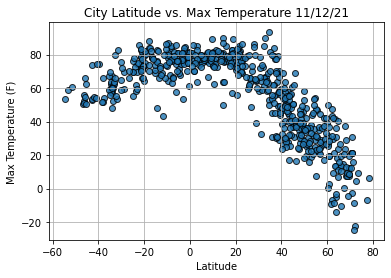

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

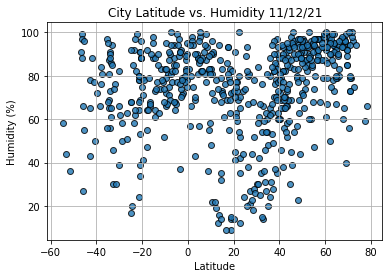

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

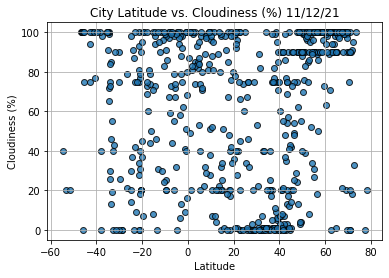

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

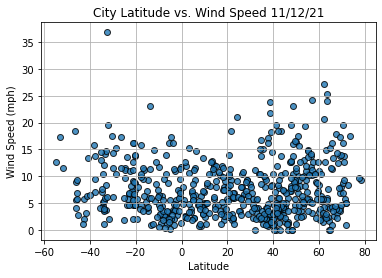

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()